# Amadeus Challenge

### Exercise 1 (number of lines for each file)

In [1]:
!wc -l bookings.csv

10000011 bookings.csv


In [2]:
!wc -l searches.csv

20390198 searches.csv


### Exercise 2 (top 10 arrival airports)

#### Moving to pandas

In [4]:
import pandas as pd
import datetime as dt

In [4]:
df = pd.read_csv('./bookings.csv', delimiter='^')

/home/matozqui/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(df.head(5))

   act_date             source  pos_ctry                          pos_iata  \
0  2013-03-05 00:00:00  1A      DE        a68dd7ae953c8acfb187a1af2dcbe123   
1  2013-03-26 00:00:00  1A      US        e612b9eeeee6f17f42d9b0d3b79e75ca   
2  2013-03-26 00:00:00  1A      US        e612b9eeeee6f17f42d9b0d3b79e75ca   
3  2013-03-26 00:00:00  1A      AU        0f984b3bb6bd06661c95529bbd6193bc   
4  2013-03-26 00:00:00  1A      AU        0f984b3bb6bd06661c95529bbd6193bc   

                          pos_oid                      rloc            \
0  1a11ae49fcbf545fd2afc1a24d88d2b7  ea65900e72d71f4626378e2ebd298267   
1  7437560d8f276d6d05eeb806d9e7edee  737295a86982c941f1c2da9a46a14043   
2  7437560d8f276d6d05eeb806d9e7edee  737295a86982c941f1c2da9a46a14043   
3  36472c6dbaf7afec9136ac40364e2794  5ecf00fdcbcec761c43dc7285253d0c1   
4  36472c6dbaf7afec9136ac40364e2794  5ecf00fdcbcec761c43dc7285253d0c1   

   cre_date            duration distance  dep_port  ...  route            \
0  2013-02-22 00

In [6]:
df.shape

(10000010, 38)

In [7]:
df['pax'].sum()

4908809.0

In [8]:
df.groupby(['arr_port'], as_index=False, sort=False).count()

,arr_port,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,LHR,215551,215551,215551,215551,215551,215551,215551,215551,215551,...,215551,215551,215551,215551,215551,215551,215551,215551,215551,215551
1,CLT,28422,28422,28422,28422,28422,28422,28422,28422,28422,...,28422,28422,28422,28422,28422,28422,28422,28422,28422,28422
2,SVO,37902,37902,37902,37902,37902,37902,37902,37902,37902,...,37902,37902,37902,37902,37902,37902,37902,37902,37902,37902
3,LGA,62212,62212,62212,62212,62212,62212,62212,62212,62212,...,62212,62212,62212,62212,62212,62212,62212,62212,62212,62212
4,SIN,78012,78012,78012,78012,78012,78012,78012,78012,78012,...,78012,78012,78012,78012,78012,78012,78012,78012,78012,78012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,KGP,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
2271,CNJ,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
2272,VEL,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
2273,SLM,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


#### Top 10 arrival airports by passengers

In [9]:
print(df.groupby(['arr_port'])['pax'].agg('sum').sort_values(ascending=False).nlargest(n=10))

arr_port
LHR         88809.0
MCO         70930.0
LAX         70530.0
LAS         69630.0
JFK         66270.0
CDG         64490.0
BKK         59460.0
MIA         58150.0
SFO         58000.0
DXB         55590.0
Name: pax, dtype: float64


### Exercise 3 (monthly destinations)

#### Moving to pandas

In [5]:
searches = pd.read_csv('./searches.csv', delimiter='^')

/home/matozqui/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print(searches.head(5))

         Date      Time TxnCode                          OfficeID Country  \
0  2013-01-01  20:25:57     MPT  624d8c3ac0b3a7ca03e3c167e0f48327      DE   
1  2013-01-01  10:15:33     MPT  b0af35b31588dc4ab06d5cf2986e8e02      MD   
2  2013-01-01  18:04:49     MPT  3561a60621de06ab1badc8ca55699ef3      US   
3  2013-01-01  17:42:40     FXP  1864e5e8013d9414150e91d26b6a558b      SE   
4  2013-01-01  17:48:29     MPT  1ec336348f44207d2e0027dc3a68c118      NO   

  Origin Destination  RoundTrip  NbSegments Seg1Departure  ... Seg6Arrival  \
0    TXL         AUH        1.0         2.0           TXL  ...         NaN   
1    ATH         MIL        0.0         1.0           ATH  ...         NaN   
2    ICT         SFO        1.0         2.0           ICT  ...         NaN   
3    RNB         ARN        0.0         1.0           RNB  ...         NaN   
4    OSL         MAD        1.0         2.0           OSL  ...         NaN   

  Seg6Date Seg6Carrier Seg6BookingCode    From IsPublishedForNeg  \


In [7]:
searches.shape

(20390198, 45)

#### Monthly number of flights arrivals to Malaga, Barcelona and Madrid

In [8]:
searches['month'] = searches['Date'].astype(str).str[5:7]

In [9]:
dest = ['AGP','BCN','MAD']

In [10]:
searches_dates = searches[searches['Destination'].isin(dest)].groupby(['Destination','month'])['Time'].agg('count')

In [14]:
searches_dates

Destination  month
AGP          01        9633
             02        8379
             03       10659
             04        8265
             05       10830
             06        7923
             07        8892
             08        7866
             09        8151
             10        6499
             11        6384
             12        3696
BCN          01       29469
             02       28329
             03       30552
             04       31236
             05       28728
             06       26505
             07       29241
             08       27075
             09       23427
             10       20276
             11       19824
             12       15400
MAD          01       24258
             02       22800
             03       24681
             04       25251
             05       26334
             06       22800
             07       22971
             08       21831
             09       21147
             10       22294
             11       20272
 

In [15]:
df_searches_dates = pd.DataFrame(searches_dates)

In [18]:
df_searches_dates['Time'].sum()

676382

In [19]:
df_searches_dates.shape

(36, 1)

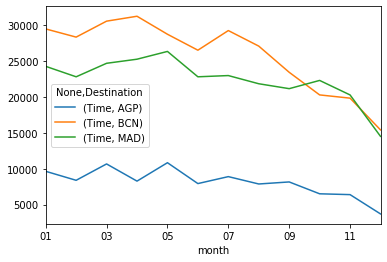

In [28]:
df_searches_dates.unstack(level=-2).plot()